In [1]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Numpy and Pandas
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Reading and Understanding the Data

In [2]:
# Expanding the output to see more columns
pd.set_option('display.max_columns', 40)

# Read the dataset
leads = pd.read_csv(r'C:\Users\Indranil\Desktop\UpGrad\IIITB with UpGrad\Machine Learning 1\Lead Scoring Case Study\Lead Scoring Assignment\Leads.csv')

# Checking the first 5 rows of the dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the number of rows and columns of the dataframe
leads.shape

(9240, 37)

In [4]:
# Checking the summary of the numerical cols present in the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking the info of the dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Dropping unnecessary columns
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace= True)

# Checking the first 5 rows of the dataframe
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Checking % of missing values before converting 'Select' to NaN.
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# Converting 'Select' values to NaN since 'Select' values are as good as NaN.
leads = leads.replace('Select', np.nan)

In [9]:
# Checking the first 5 rows of the dataframe
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Checking % of missing values after converting 'Select' to NaN.
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Checking the number of rows and columns of the dataframe
leads.shape

(9240, 35)

In [12]:
# Removing columns which has more than 40% missing data
leads_null = leads.isnull().sum()/len(leads.index)
missing_data = leads_null[leads_null > 0.40].index
leads.drop(missing_data, axis=1, inplace=True)

# Checking the number of rows and columns of the dataframe
leads.shape

(9240, 28)

In [13]:
# Checking % of Null values after removing columns having more than 40% missing data
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### As we can see, some columns still have large number of missing values. We would go through the columns one by one and take care of the missing values.

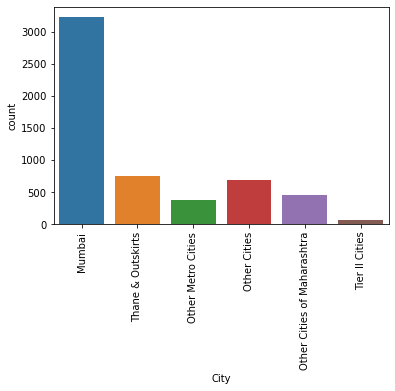

In [14]:
# Plotting a countplot for 'City'.
sns.countplot(leads['City'])
plt.xticks(rotation=90);

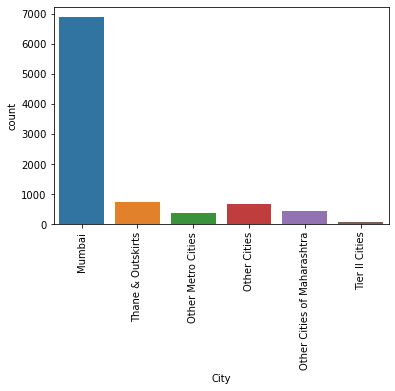

In [15]:
# We can replace NaN values of City with 'Mumbai'.
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

# Plotting a countplot for 'City' after replacing the null values with 'Mumbai'.
sns.countplot(leads['City'])
plt.xticks(rotation=90);

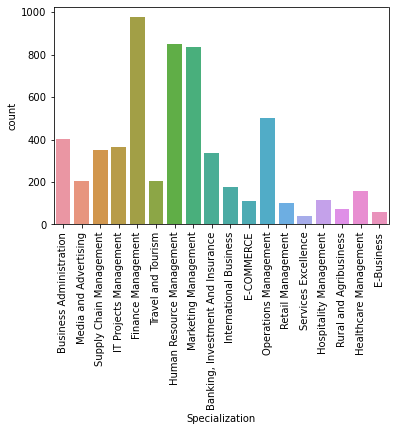

In [16]:
# Plotting a countplot for 'Specialization'.
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90);

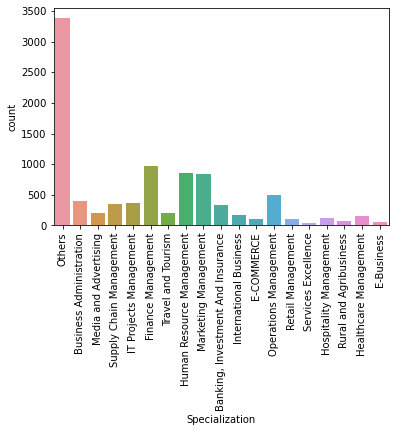

In [17]:
# Candidate may not choose from the above specializations. Assigning 'Others' to NaN values.
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

# Plotting a countplot for 'Specialization' after replacing the null values with 'Others'.
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90);

### Note:
- There are few sales team generated columns present in the data.
- When we will be running the ML model to understand which candidate should the sales team call first and which candidate should they call last, the data that we will be using will be directly from the form. The data would not be having the sales team generated data. Hence, we need to remove all the sales team generated data before building our model.
- Sales team generated columns are: **Tags, Lead Quality, Last Activity, Last Notable Activity, Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score**. Some columns are already dropped since they had more than 40% missing data, rest we would be subsequently dropping before building our model.

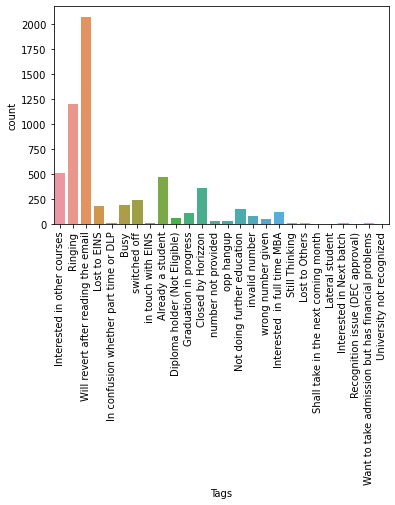

In [18]:
# Plotting a countplot for 'Tags'.
sns.countplot(leads['Tags'])
plt.xticks(rotation=90);

In [19]:
# Dropping 'Tags' since this is a sales team generated column
leads.drop('Tags', axis=1, inplace=True)
leads.shape

(9240, 27)

In [20]:
# Checking % of Null values again.
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

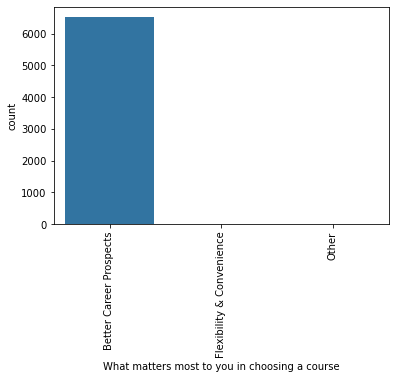

In [21]:
# Plotting a countplot for 'What matters most to you in choosing a course'.
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation=90);

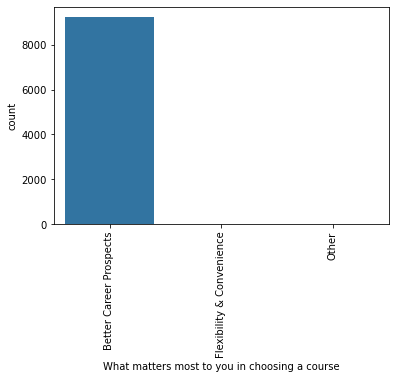

In [22]:
# Assigning 'Better Career Prospects' to NaN values.
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# Plotting a countplot for 'What matters most to you in choosing a course' after replacing the null values with 
#'Better Career Prospects'.
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation=90);

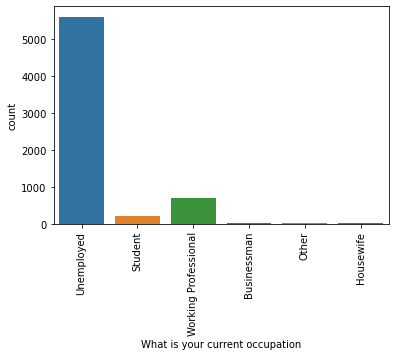

In [23]:
# Plotting a countplot for 'What is your current occupation'.
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=90);

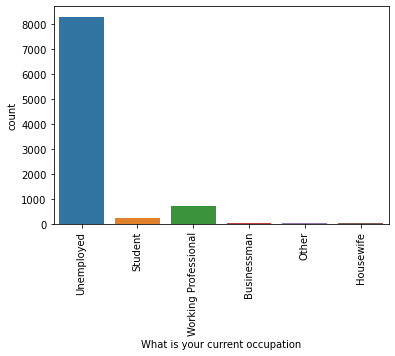

In [24]:
# Assigning 'Unemployed' to NaN values.
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

# Plotting a countplot for 'What is your current occupation' after replacing the null values with 'Unemployed'.
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=90);

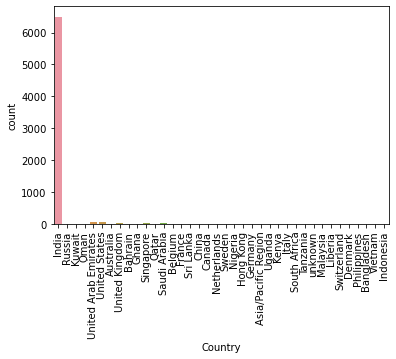

In [25]:
# Plotting a countplot for 'Country'.
sns.countplot(leads['Country'])
plt.xticks(rotation=90);

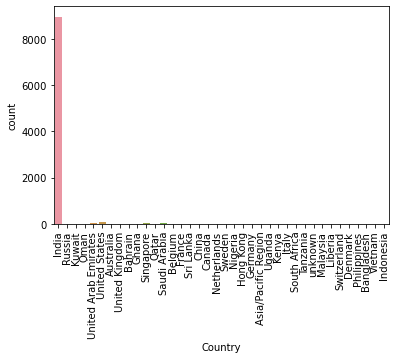

In [26]:
# Assigning 'India' to NaN values.
leads['Country'] = leads['Country'].replace(np.nan, 'India')

# Plotting a countplot for 'Country' after replacing the null values with 'India'.
sns.countplot(leads['Country'])
plt.xticks(rotation=90);

In [27]:
# Checking % of null values again.
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [28]:
# Dropping rows where missing values are less than 2 percent.
leads.dropna(inplace = True)

In [29]:
# Checking % of Null values after handling missing values.
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [30]:
# Dropping below columns since they're sales team generated columns.
leads.drop(['Last Notable Activity', 'Last Activity'], axis=1, inplace=True)
leads.shape

(9074, 25)

## Exploratory Data Analysis

### Univariate Analysis

In [31]:
# Checking the converted rate.
round(sum(leads['Converted'])/len(leads.index) * 100, 2)

37.86

In [32]:
# Function for plotting repetitive plots.
def univariate(cols):
    plt.figure(figsize=(10,5))
    s1 = sns.countplot(leads[cols], order=leads[cols].value_counts().index, hue = leads['Converted'])
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

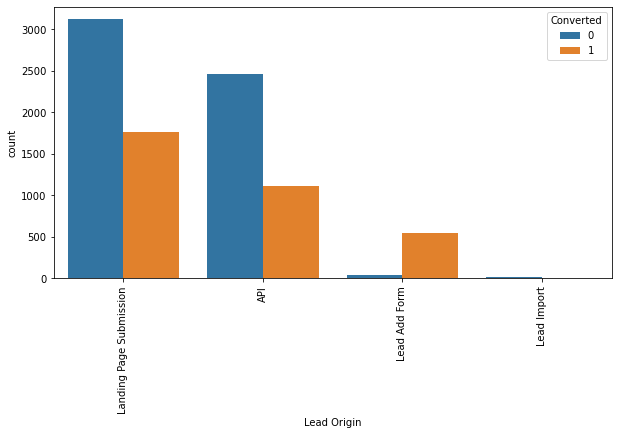

In [33]:
# Checking 'Lead Origin' w.r.t 'Converted'.
univariate('Lead Origin')

### Inference:
- 'API' and 'Landing Page Submission' generate maximum number of leads.
- 'Lead Add Form' has a great conversion rate but the count of lead is not very high.
- 'Lead Import' is very less in count.
- To improve conversion rate, company should focus on improving lead conversion of 'API', 'Landing Page Submission' and also generate more leads from 'Lead Add Form' and 'Lead Import'.

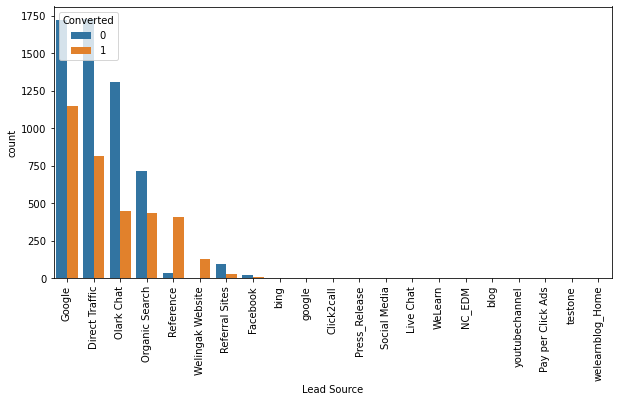

In [34]:
# Checking 'Lead Source' w.r.t 'Converted'.
univariate('Lead Source')

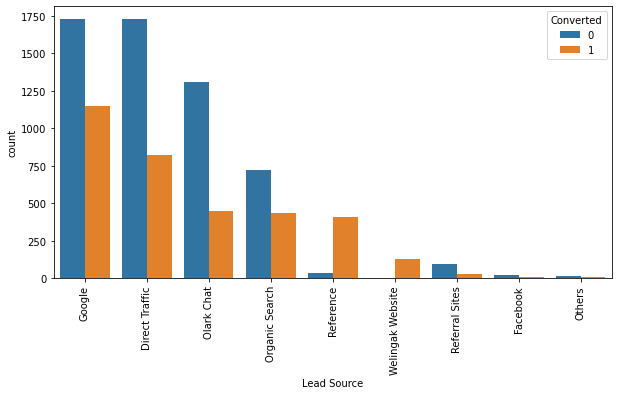

In [35]:
# We can see there are a lot of categories under Lead source. Thus, grouping some to 'Others' to reduce the number of dummies
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                      'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

# Checking 'Lead Source' w.r.t 'Converted'.
univariate('Lead Source')

### Inference:
- 'Google' and 'Dirrect Traffic' generates maximum amount of leads.
- Conversion rates of 'Reference' and 'Welingak' Website are high.
- To improve conversion rate, company should focus on improving lead conversion from 'Olark Chat', 'Organic Search', 'Google', 'Direct Traffic' and also generate more leads from 'Reference' and 'Welingak Website'.

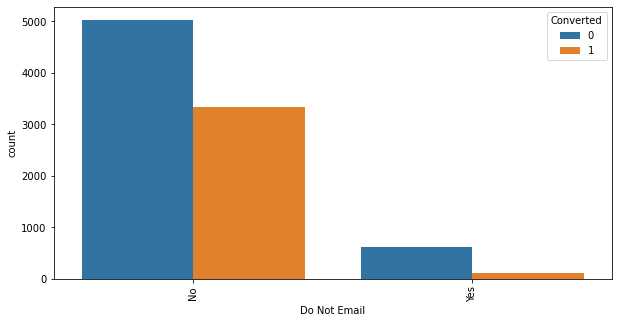

In [36]:
# Checking 'Do Not Email' w.r.t 'Converted'.
univariate('Do Not Email')

### Inference:
- Customers to whom the course details were emailed had a high chance of converting than the customers to whom the course details were not emailed.
- To improve conversion rate, the company should send the course details as an email to the customers.

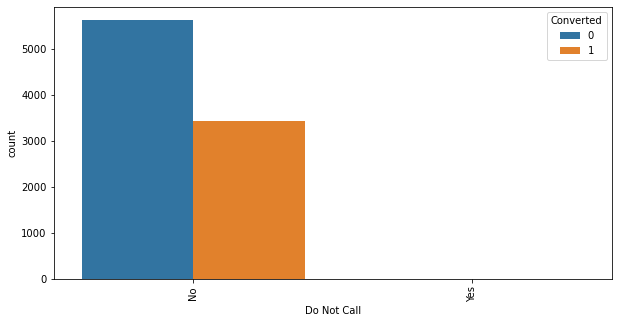

In [37]:
# Checking 'Do Not Call' w.r.t 'Converted'.
univariate('Do Not Call')

### Inference:
- Similar trend is also seen here. Customers who had received a call about the course curriculum had a lot more chance of converting.
- To improve conversion rate, the company should call the customers and explain the course curriculum.

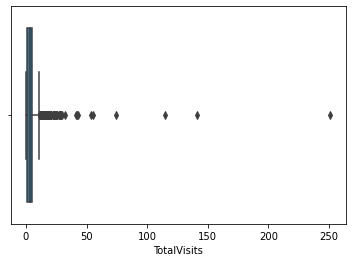

In [38]:
# Plotting boxplot for 'TotalVisits'.
sns.boxplot(leads['TotalVisits']);

# We can see 'TotalVisits' has outliers.

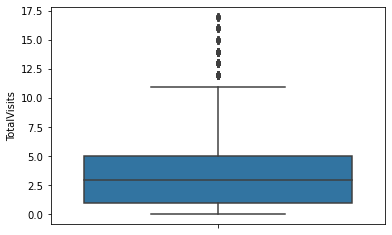

In [39]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

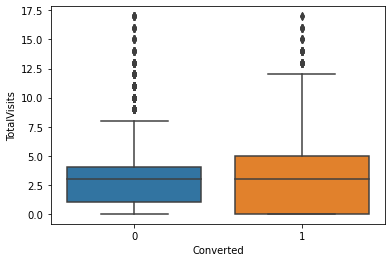

In [40]:
# Plotting boxplot between 'TotalVisits' and 'Converted'.
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads);

### Inference:
- Median is same for Converted and Non-converted. Nothing conclusive can be said.

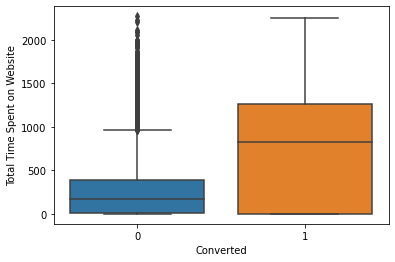

In [41]:
# Plotting boxplot between 'Total Time Spent on Website' and 'Converted'.
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads);

### Inference:
- Customers spending more time on the website are likely to be converted.
- Companies should thus try and make the websites more engaging so that the customers spend more time.

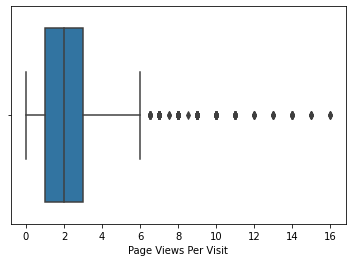

In [42]:
# Plotting boxplot for 'Page Views Per Visit'.
sns.boxplot(leads['Page Views Per Visit']);

# 'Page Views Per Visit' column has outliers.

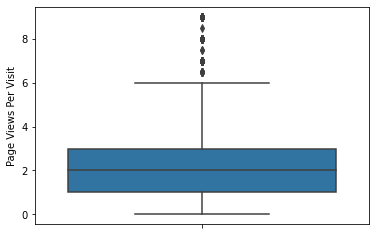

In [43]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

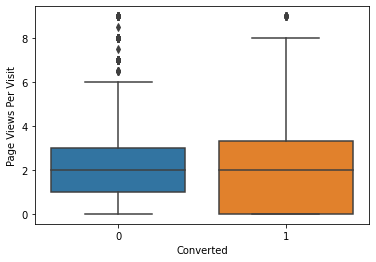

In [44]:
# Plotting boxplot between 'Page Views Per Visit' and 'Converted'.
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads);

### Inference:
- Median is same for Converted and Non-converted. Nothing conclusive can be said.

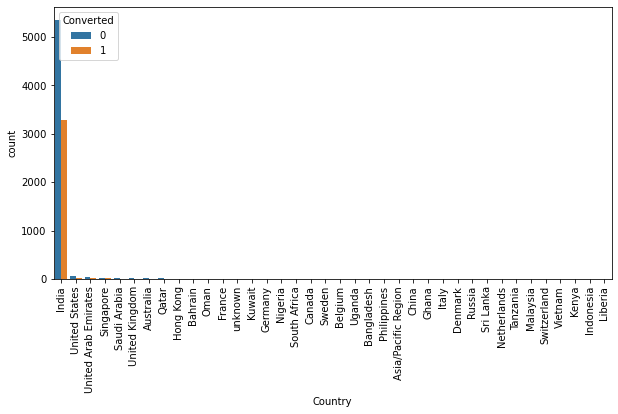

In [45]:
# Checking 'Country' w.r.t 'Converted'.
univariate('Country')

### Inference:
- Most values are from 'India'.

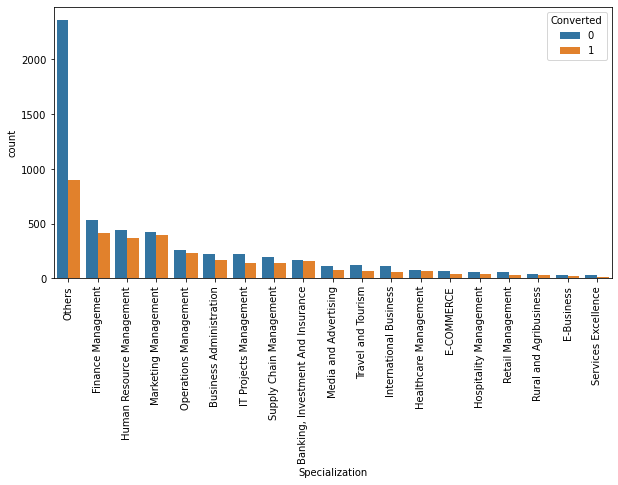

In [46]:
# Checking 'Specialization' w.r.t 'Converted'.
univariate('Specialization')

### Inference:
- Specializations such as 'Finance Management', 'HR Management', 'Marketing Management', 'Operations Management', 'Business Administration' etc have higher conversion rate.
- Companies should thus focus on specializations which have higher conversion rate.

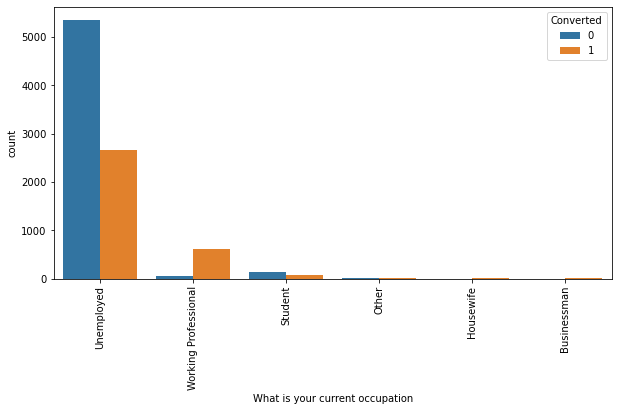

In [47]:
# Checking 'What is your current occupation' w.r.t 'Converted'.
univariate('What is your current occupation')

### Inference:
- 'Unemployed' people are more in numbers, but have poor conversion rate.
- 'Working Professional' people opting for the course have a higher chance of converting.
- Company should thus focus more on 'Working Professional' and 'Unemployed' people.

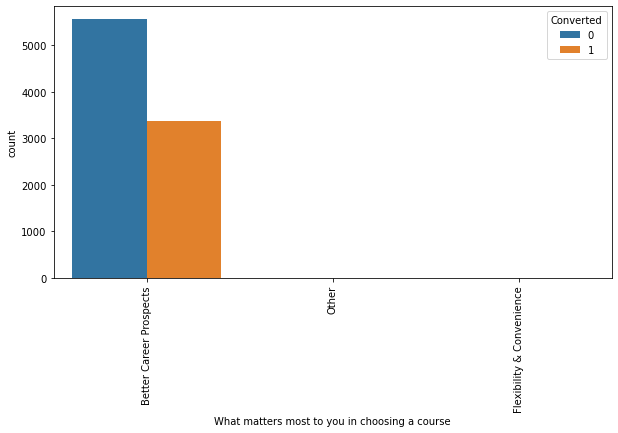

In [48]:
# Checking 'What matters most to you in choosing a course' w.r.t 'Converted'.
univariate('What matters most to you in choosing a course')

### Inference:
- Everyone wants to enroll for the course in order to have 'Better Career Prospects'.

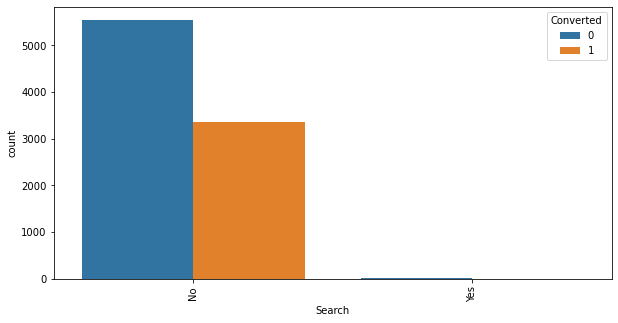

In [49]:
# Checking 'Search' w.r.t 'Converted'.
univariate('Search')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

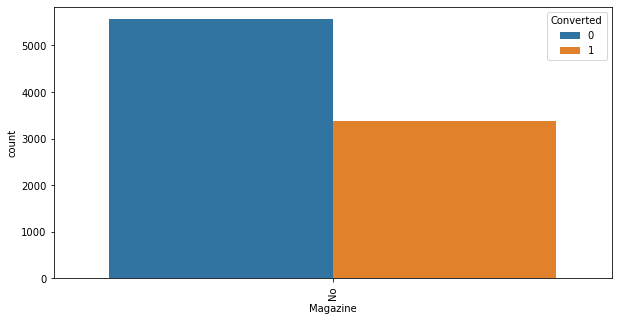

In [50]:
# Checking 'Magazine' w.r.t 'Converted'.
univariate('Magazine')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

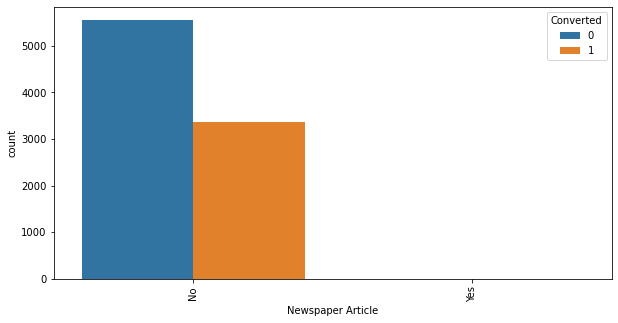

In [51]:
# Checking 'Newspaper Article' w.r.t 'Converted'.
univariate('Newspaper Article')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

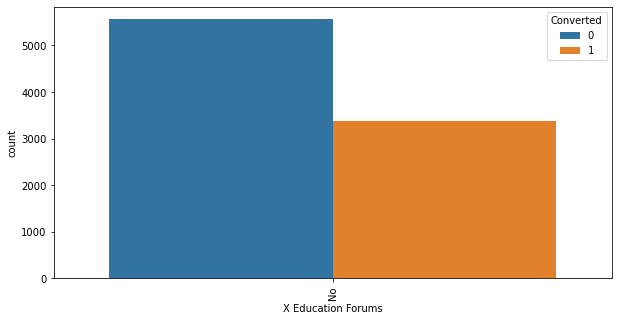

In [52]:
# Checking 'X Education Forums' w.r.t 'Converted'.
univariate('X Education Forums')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

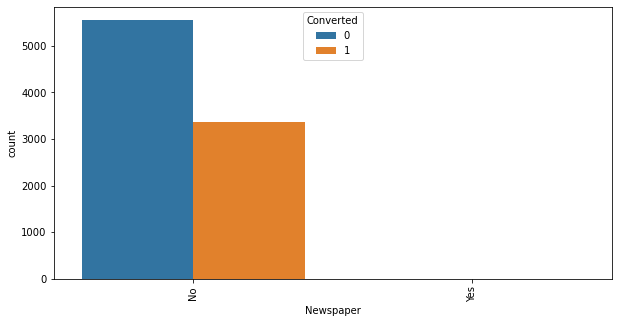

In [53]:
# Checking 'Newspaper' w.r.t 'Converted'.
univariate('Newspaper')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

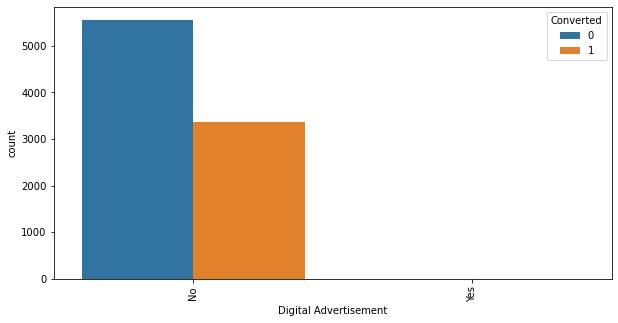

In [54]:
# Checking 'Digital Advertisement' w.r.t 'Converted'.
univariate('Digital Advertisement')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

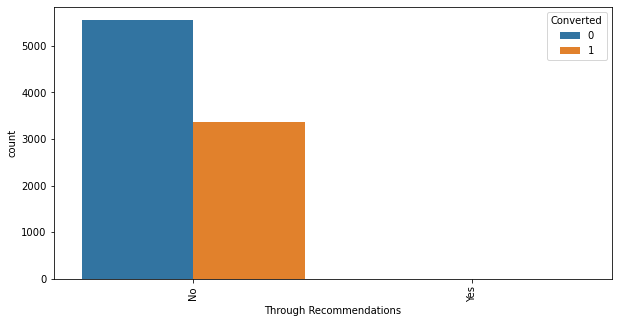

In [55]:
# Checking 'Through Recommendations' w.r.t 'Converted'.
univariate('Through Recommendations')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

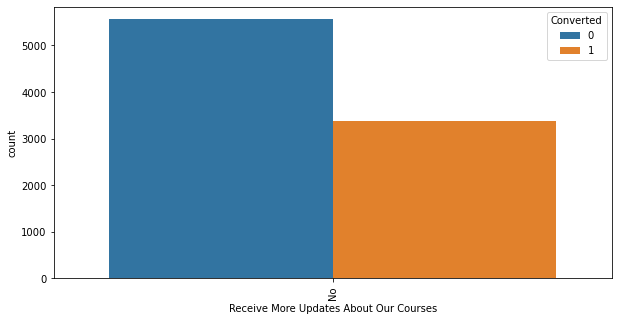

In [56]:
# Checking 'Receive More Updates About Our Courses' w.r.t 'Converted'.
univariate('Receive More Updates About Our Courses')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

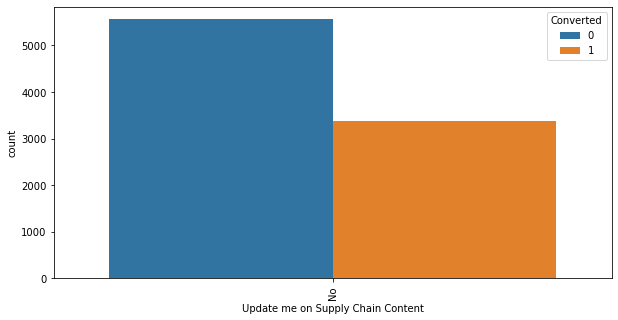

In [57]:
# Checking 'Update me on Supply Chain Content' w.r.t 'Converted'.
univariate('Update me on Supply Chain Content')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

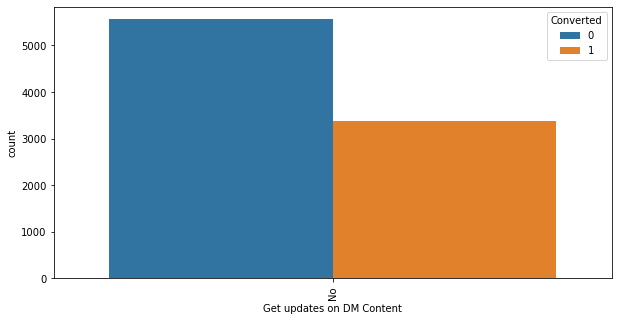

In [58]:
# Checking 'Get updates on DM Content' w.r.t 'Converted'.
univariate('Get updates on DM Content')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

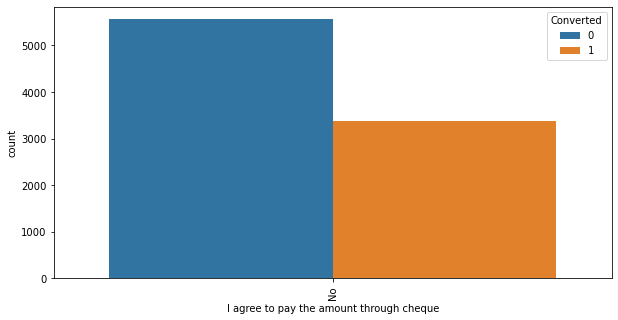

In [59]:
# Checking 'I agree to pay the amount through cheque' w.r.t 'Converted'.
univariate('I agree to pay the amount through cheque')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

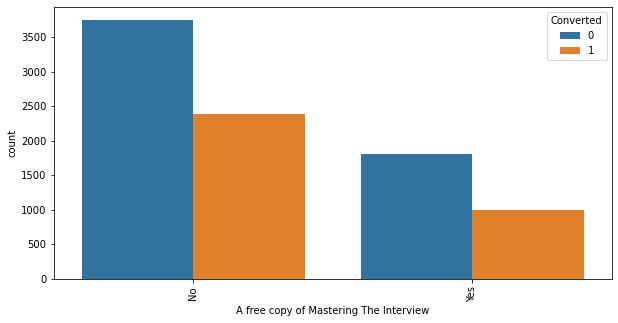

In [60]:
# Checking 'A free copy of Mastering The Interview' w.r.t 'Converted'.
univariate('A free copy of Mastering The Interview')

### Inference:
- Most entries are 'No'. No conclusive inference can be drawn.

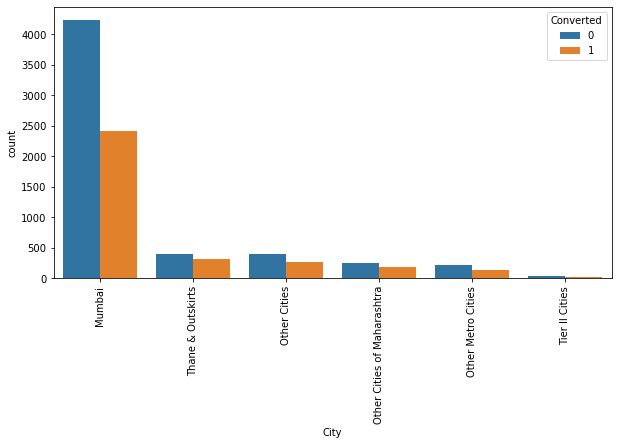

In [61]:
# Checking 'City' w.r.t 'Converted'.
univariate('City')

### Inference:
- Majority of the customers are from 'Mumbai'.

#### Based on univariate analysis, some columns doesn't add much information to the model. Thus, dropping the ir-relevant columns.

In [62]:
# Checking the first 5 rows of the dataframe.
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [63]:
# Columns to drop.
cols = ['Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
        'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
        'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
        'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Dropping ir-relevant columns.
leads.drop(cols, axis=1, inplace=True)

In [64]:
# Checking the number of rows and columns of the dataframe
leads.shape

(8924, 11)

In [65]:
# Checking the first 5 rows of the dataframe.
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,Mumbai
1,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai


## Data Preparation

In [66]:
# List of variables.
varlist = ['Do Not Email', 'Do Not Call']

# map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

#Converting binary variables (Yes/No) to 0/1
leads[varlist] = leads[varlist].apply(binary_map)

In [67]:
# Checking the info of the dataset to find out categorical columns.
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8924 non-null   object 
 1   Lead Source                      8924 non-null   object 
 2   Do Not Email                     8924 non-null   int64  
 3   Do Not Call                      8924 non-null   int64  
 4   Converted                        8924 non-null   int64  
 5   TotalVisits                      8924 non-null   float64
 6   Total Time Spent on Website      8924 non-null   int64  
 7   Page Views Per Visit             8924 non-null   float64
 8   Specialization                   8924 non-null   object 
 9   What is your current occupation  8924 non-null   object 
 10  City                             8924 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [68]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,Mumbai
1,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai


In [69]:
# Creating dummy variables for categorical columns and dropping the first one
dummy1 =  pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']],
                                drop_first=True)

# Concatenating the results with 'leads' dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# list of columns to be dropped.
cols = ['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']

# Dropping the categorical columns for which dummy variables are already created
leads.drop(cols, axis=1, inplace=True)

# Checking the shape of the dataframe after dropping the respective columns.
leads.shape

(8924, 45)

## Train-Test Split

In [71]:
# Splitting the data into train and test.
df_train, df_test = train_test_split(leads, train_size = 0.7, test_size=0.3, random_state=100)

#Checking the shape of 'df_train' dataframe
df_train.shape

(6246, 45)

In [72]:
# Checking the first 5 rows of the 'df_train' dataframe.
df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
6676,0,0,1,3.0,1247,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6138,0,0,1,4.0,816,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8650,0,0,1,3.0,1128,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3423,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6552,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
# Rescaling 'df_train' dataframe.

# Instantiate an object.
scaler = StandardScaler()

# List of columns where scaler needs to be applied.
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit the scaler on the data.
df_train[cols] = scaler.fit_transform(df_train[cols])

# Checking the first 5 rows of the 'df_train' dataframe after re-scaling.
df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
6676,0,0,1,-0.049636,1.395668,0.395289,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6138,0,0,1,0.297929,0.609686,0.926758,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8650,0,0,1,-0.049636,1.178657,0.395289,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3423,0,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6552,0,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [74]:
# Checking the converted rate
round(sum(leads['Converted'])/len(leads.index) * 100, 3)

# We have around 38% convertion rate.

37.752

## Logistic Regression Model building

In [75]:
# Splitting 'df_train' dataframe into 'X_train' and 'y_train'
y_train = df_train.pop('Converted')
X_train = df_train

In [76]:
# Building the first logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6201
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.3
Date:                Mon, 17 May 2021   Deviance:                       5770.7
Time:                        23:21:44   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7304      2.374     -0.308      0.758      -5.383       3.922
Do Not Email                                            -1.3932      0.170     -8.212      0.000      -1.726      -1.061
Do Not Call                                             20.1696   3.36e+04      0.001      1.000   -6.58e+04    6.59e+04
TotalVisits                                              0.2120      0.047      4.510      0.000       0.120       0.304
Total Time Spent on Website                              1.1029      0.039     28.461      0.000       1.027       1.179
Page Views Per Visit                                    -0.1369      0.054     -2.548      0.011      -0.242      -0.032
Lead Origin_Landing Page Submission                     -0.7103      0.129     -5.503      0.000      -0.963      -0.457
Lead Origin_Lead Add Form                                2.1612      1.117      1.935      0.053      -0.028       4.351
Lead Origin_Lead Import                                 21.4451   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -20.3285   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3581      0.093      3.855      0.000       0.176       0.540
Lead Source_Olark Chat                                   1.1724      0.147      8.000      0.000       0.885       1.460
Lead Source_Organic Search                               0.3175      0.125      2.533      0.011       0.072       0.563
Lead Source_Others                                      -0.1114      0.877     -0.127      0.899      -1.830       1.607
Lead Source_Reference                                    1.9827      1.138      1.742      0.081      -0.248       4.213
Lead Source_Referral Sites                              -0.2526      0.324     -0.779      0.436      -0.888       0.383
Lead Source_Welingak Website                             4.2621      1.331      3.201      0.001       1.653       6.872
Specialization_Business Administration                  -0.3570      0.236     -1.512      0.131      -0.820       0.106
Specialization_E-Business                               -0.4607      0.434     -1.061      0.289      -1.312       0.390
Specialization_E-COMMERCE                               -0.2633      0.331     -0.795      0.427      -0.913       0.386
Specialization_Finance Management                       -0.3750      0.200     -1.880      0.060      -0.766       0.016
Specialization_Healthcare Management                    -0.4009      0.304     -1.318      0.188      -0.997       0.195
Specialization_Hospitality Management                   -1

### Inference:
- We can see there are plenty of variables whose p-values are very high and thus insignificant. We would thus use 'RFE' and find out '15' most important variables and build our model on those variables.

## Feature Selection Using RFE

In [77]:
# Feature selection using RFE
logreg = LogisticRegression()

# Running RFE with o/p number of variable equal to 15
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [78]:
# Checking the 15 predictor variables which have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 10),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 17),
 ('Specialization_Healthcare Management', False, 20),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 26),
 ('Specialization_IT Projects Ma

In [79]:
# Storing the selected 15 cols in 'col' list
col = X_train.columns[rfe.support_]

In [80]:
# Checking the cols which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other 

In [81]:
# Checking the cols which are selected by RFE
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Assessing the model with StatsModels

In [82]:
# Building the second logistic regression model using the cols selected by 'RFE'
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2913.3
Date:                Mon, 17 May 2021   Deviance:                       5826.5
Time:                        23:21:49   Pearson chi2:                 6.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6216      2.328     -0.267      0.789      -5.184       3.940
Do Not Email                                            -1.4587      0.167     -8.710      0.000      -1.787      -1.130
Total Time Spent on Website                              1.1087      0.038     28.900      0.000       1.034       1.184
Lead Origin_Landing Page Submission                     -0.8823      0.121     -7.316      0.000      -1.119      -0.646
Lead Origin_Lead Add Form                                1.7433      0.912      1.913      0.056      -0.043       3.530
Lead Origin_Lead Import                                  0.7738      0.501      1.546      0.122      -0.207       1.755
Lead Source_Olark Chat                                   0.7913      0.111      7.137      0.000       0.574       1.009
Lead Source_Reference                                    2.0106      0.935      2.150      0.032       0.177       3.844
Lead Source_Welingak Website                             4.3158      1.163      3.711      0.000       2.036       6.595
Specialization_Hospitality Management                   -0.9294      0.325     -2.862      0.004      -1.566      -0.293
Specialization_Others                                   -1.1142      0.116     -9.573      0.000      -1.342      -0.886
What is your current occupation_Housewife               23.2489   1.63e+04      0.001      0.999    -3.2e+04    3.21e+04
What is your current occupation_Other                    0.5686      2.428      0.234      0.815      -4.189       5.327
What is your current occupation_Student                  0.4811      2.334      0.206      0.837      -4.093       5.055
What is your current occupation_Unemployed               0.4936      2.324      0.212      0.832      -4.061       5.048
What is your current occupation_Working Professional     3.1006      2.331      1.330      0.183      -1.467       7.668
========================================================================================================================
"""

In [83]:
# 'What is your current occupation_Housewife' variable has very high p-value. Thus, dropping the variable.
col = col.drop('What is your current occupation_Housewife')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [84]:
# Re-building the model.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.0
Date:                Mon, 17 May 2021   Deviance:                       5829.9
Time:                        23:21:49   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2827      1.191      1.916      0.055      -0.052       4.617
Do Not Email                                            -1.4584      0.167     -8.709      0.000      -1.787      -1.130
Total Time Spent on Website                              1.1081      0.038     28.896      0.000       1.033       1.183
Lead Origin_Landing Page Submission                     -0.8877      0.121     -7.361      0.000      -1.124      -0.651
Lead Origin_Lead Add Form                                1.7386      0.912      1.907      0.057      -0.048       3.526
Lead Origin_Lead Import                                  0.7703      0.501      1.538      0.124      -0.211       1.752
Lead Source_Olark Chat                                   0.7911      0.111      7.133      0.000       0.574       1.008
Lead Source_Reference                                    2.0084      0.936      2.147      0.032       0.175       3.842
Lead Source_Welingak Website                             4.3211      1.163      3.715      0.000       2.041       6.601
Specialization_Hospitality Management                   -0.9298      0.325     -2.863      0.004      -1.566      -0.293
Specialization_Others                                   -1.1215      0.116     -9.638      0.000      -1.350      -0.893
What is your current occupation_Other                   -2.3313      1.376     -1.694      0.090      -5.028       0.366
What is your current occupation_Student                 -2.4172      1.203     -2.009      0.045      -4.775      -0.059
What is your current occupation_Unemployed              -2.4048      1.184     -2.032      0.042      -4.725      -0.085
What is your current occupation_Working Professional     0.2012      1.196      0.168      0.866      -2.144       2.546
========================================================================================================================
"""

In [85]:
# 'What is your current occupation_Working Professional' variable has very high p-value. Thus, dropping the variable.
col = col.drop('What is your current occupation_Working Professional')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed'],
      dtype='object')

In [86]:
# Re-building the model.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.0
Date:                Mon, 17 May 2021   Deviance:                       5830.0
Time:                        23:21:49   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.4803      0.205     12.125      0.000       2.079       2.881
Do Not Email                                  -1.4582      0.167     -8.708      0.000      -1.786      -1.130
Total Time Spent on Website                    1.1081      0.038     28.896      0.000       1.033       1.183
Lead Origin_Landing Page Submission           -0.8883      0.121     -7.370      0.000      -1.125      -0.652
Lead Origin_Lead Add Form                      1.7382      0.912      1.906      0.057      -0.049       3.525
Lead Origin_Lead Import                        0.7701      0.501      1.538      0.124      -0.211       1.751
Lead Source_Olark Chat                         0.7911      0.111      7.134      0.000       0.574       1.008
Lead Source_Reference                          2.0086      0.936      2.147      0.032       0.175       3.842
Lead Source_Welingak Website                   4.3216      1.163      3.715      0.000       2.042       6.602
Specialization_Hospitality Management         -0.9294      0.325     -2.862      0.004      -1.566      -0.293
Specialization_Others                         -1.1221      0.116     -9.649      0.000      -1.350      -0.894
What is your current occupation_Other         -2.5284      0.723     -3.498      0.000      -3.945      -1.112
What is your current occupation_Student       -2.6142      0.281     -9.316      0.000      -3.164      -2.064
What is your current occupation_Unemployed    -2.6018      0.179    -14.518      0.000      -2.953      -2.251
==============================================================================================================
"""

In [87]:
# 'Lead Origin_Lead Import' variable has very high p-value. Thus, dropping the variable.
col = col.drop('Lead Origin_Lead Import')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed'],
      dtype='object')

In [88]:
# Re-building the model.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.1
Date:                Mon, 17 May 2021   Deviance:                       5832.1
Time:                        23:21:50   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5046      0.204     12.276      0.000       2.105       2.904
Do Not Email                                  -1.4592      0.167     -8.719      0.000      -1.787      -1.131
Total Time Spent on Website                    1.1029      0.038     28.917      0.000       1.028       1.178
Lead Origin_Landing Page Submission           -0.9123      0.120     -7.625      0.000      -1.147      -0.678
Lead Origin_Lead Add Form                      1.7143      0.911      1.881      0.060      -0.072       3.501
Lead Source_Olark Chat                         0.7730      0.110      7.020      0.000       0.557       0.989
Lead Source_Reference                          2.0097      0.935      2.148      0.032       0.176       3.843
Lead Source_Welingak Website                   4.3289      1.163      3.722      0.000       2.049       6.609
Specialization_Hospitality Management         -0.9194      0.325     -2.825      0.005      -1.557      -0.281
Specialization_Others                         -1.1366      0.116     -9.785      0.000      -1.364      -0.909
What is your current occupation_Other         -2.5301      0.723     -3.500      0.000      -3.947      -1.113
What is your current occupation_Student       -2.6140      0.281     -9.317      0.000      -3.164      -2.064
What is your current occupation_Unemployed    -2.5996      0.179    -14.508      0.000      -2.951      -2.248
==============================================================================================================
"""

In [89]:
# 'Lead Origin_Lead Add Form' variable has very high p-value. Thus, dropping the variable.
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed'],
      dtype='object')

In [90]:
# Re-building the model.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.0
Date:                Mon, 17 May 2021   Deviance:                       5836.1
Time:                        23:21:50   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5259      0.204     12.383      0.000       2.126       2.926
Do Not Email                                  -1.4606      0.167     -8.727      0.000      -1.789      -1.133
Total Time Spent on Website                    1.1008      0.038     28.907      0.000       1.026       1.175
Lead Origin_Landing Page Submission           -0.9361      0.119     -7.858      0.000      -1.170      -0.703
Lead Source_Olark Chat                         0.7655      0.110      6.965      0.000       0.550       0.981
Lead Source_Reference                          3.7090      0.242     15.357      0.000       3.236       4.182
Lead Source_Welingak Website                   6.0360      0.728      8.289      0.000       4.609       7.463
Specialization_Hospitality Management         -0.9222      0.326     -2.833      0.005      -1.560      -0.284
Specialization_Others                         -1.1564      0.116     -9.984      0.000      -1.383      -0.929
What is your current occupation_Other         -2.5321      0.723     -3.501      0.000      -3.950      -1.114
What is your current occupation_Student       -2.6122      0.281     -9.307      0.000      -3.162      -2.062
What is your current occupation_Unemployed    -2.5956      0.179    -14.480      0.000      -2.947      -2.244
==============================================================================================================
"""

## Checking VIFs

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,7.70
2,Lead Origin_Landing Page Submission,4.70
7,Specialization_Others,3.86
3,Lead Source_Olark Chat,2.01
1,Total Time Spent on Website,1.24
9,What is your current occupation_Student,1.20
4,Lead Source_Reference,1.15
0,Do Not Email,1.10
5,Lead Source_Welingak Website,1.07
6,Specialization_Hospitality Management,1.02


### Inference:
- VIF value of 'What is your current occupation_Unemployed' is high. In terms of EDA, 'Unemployed' customers can be a good segment to target since they have good conversion rate. Thus, not dropping 'What is your current occupation_Unemployed'.
- Dropping 'Lead Origin_Landing Page Submission' and checking if the VIF of the variables improve.

In [92]:
# 'Lead Origin_Landing Page Submission' variable has high VIF. Thus, dropping the variable.
col = col.drop('Lead Origin_Landing Page Submission')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed'],
      dtype='object')

In [93]:
# Re-building the model.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.5
Date:                Mon, 17 May 2021   Deviance:                       5898.9
Time:                        23:21:50   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7483      0.173     10.113      0.000       1.409       2.087
Do Not Email                                  -1.5081      0.166     -9.099      0.000      -1.833      -1.183
Total Time Spent on Website                    1.1152      0.038     29.338      0.000       1.041       1.190
Lead Source_Olark Chat                         1.0556      0.104     10.105      0.000       0.851       1.260
Lead Source_Reference                          4.2085      0.231     18.208      0.000       3.755       4.662
Lead Source_Welingak Website                   6.2591      0.728      8.598      0.000       4.832       7.686
Specialization_Hospitality Management         -0.9059      0.321     -2.823      0.005      -1.535      -0.277
Specialization_Others                         -0.5108      0.081     -6.285      0.000      -0.670      -0.352
What is your current occupation_Other         -2.4266      0.709     -3.425      0.001      -3.815      -1.038
What is your current occupation_Student       -2.6872      0.276     -9.730      0.000      -3.228      -2.146
What is your current occupation_Unemployed    -2.6429      0.177    -14.963      0.000      -2.989      -2.297
==============================================================================================================
"""

In [94]:
# Checking VIF again.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Others,2.33
2,Lead Source_Olark Chat,1.92
9,What is your current occupation_Unemployed,1.90
1,Total Time Spent on Website,1.24
0,Do Not Email,1.09
3,Lead Source_Reference,1.08
4,Lead Source_Welingak Website,1.06
8,What is your current occupation_Student,1.03
5,Specialization_Hospitality Management,1.02
7,What is your current occupation_Other,1.00


## Inference:
- 'p' values of all the predictor variables seems significant.
- VIF values of all the predictor variables are less than '5' and thus we could conclude that there is very low multi-collinearity between the predictor variables.

In [95]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.659683
6138    0.446536
8650    0.955330
3423    0.209248
6552    0.209248
1696    0.148143
2110    0.736322
6830    0.069179
2581    0.468743
5927    0.148281
dtype: float64

In [96]:
# Re-shaping the predicted values.
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.65968316, 0.44653576, 0.95532993, 0.20924754, 0.20924754,
       0.14814267, 0.73632157, 0.06917934, 0.468743  , 0.14828072])

In [97]:
# Creating a dataframe with the actual churn flag and the predicted probabilities.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.659683,6676
1,1,0.446536,6138
2,1,0.955330,8650
3,0,0.209248,3423
4,0,0.209248,6552


In [98]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking the first 5 rows of the predicted dataframe.
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.659683,6676,1
1,1,0.446536,6138,0
2,1,0.955330,8650,1
3,0,0.209248,3423,0
4,0,0.209248,6552,0


In [99]:
# Creating the confusion matrix.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3412  459]
 [ 874 1501]]


In [100]:
# Predicted     not_converted    converted
# Actual
# not_converted        3412      459
# converted            874       1501  

In [101]:
# Checking the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7865834133845662


## Metrics beyond simply accuracy

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Checking the sensitivity of our logistic regression model.
TP / float(TP+FN)

0.632

In [104]:
# Checking the specificity of our logistic regression model. 
TN / float(TN+FP)

0.8814259881167656

In [105]:
# Calculating the false postive rate.
print(FP/ float(TN+FP))

0.11857401188323431


In [106]:
# Calculating the Positive predictive value. 
print (TP / float(TP+FP))

0.7658163265306123


In [107]:
# Calculating the Negative predictive value.
print (TN / float(TN+ FN))

0.7960802613159123


## Plotting the ROC Curve

In [108]:
# Function to plot the ROC Curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

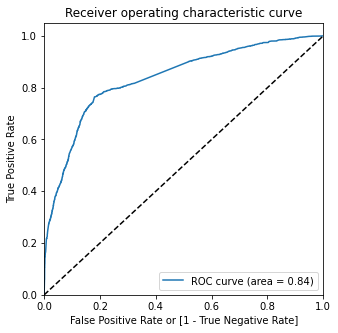

In [109]:
# Plotting the 'ROC' curve.
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Area under 'ROC' curve = '0.84'

## Finding Optimal Cut-off Point

In [110]:
# Creating columns with different probability cut-offs.
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.659683,6676,1,1,1,1,1,1,1,1,0,0,0
1,1,0.446536,6138,0,1,1,1,1,1,0,0,0,0,0
2,1,0.955330,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.209248,3423,0,1,1,1,0,0,0,0,0,0,0
4,0,0.209248,6552,0,1,1,1,0,0,0,0,0,0,0


In [111]:
# Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.454691  0.986947  0.128132
0.2   0.2  0.625520  0.909895  0.451046
0.3   0.3  0.796670  0.765053  0.816068
0.4   0.4  0.797310  0.698526  0.857918
0.5   0.5  0.786583  0.632000  0.881426
0.6   0.6  0.768332  0.534316  0.911909
0.7   0.7  0.747679  0.429474  0.942909
0.8   0.8  0.724944  0.322105  0.972100
0.9   0.9  0.696446  0.213895  0.992508


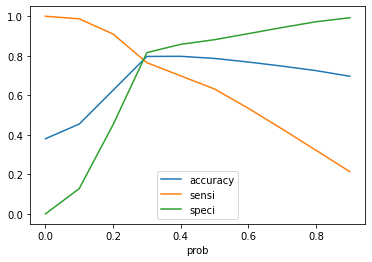

In [112]:
# Plotting the 'cutoff_df' dataframe.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [113]:
# From the above curve, '0.3' is the optimum point. We can consider '0.3' as the cut-off probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Checking the first 5 rows.
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.659683,6676,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.446536,6138,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.955330,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.209248,3423,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.209248,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [114]:
# Calculating 'Lead Score'.
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map(lambda x :  round(x * 100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.659683,6676,1,1,1,1,1,1,1,1,0,0,0,1,66
1,1,0.446536,6138,0,1,1,1,1,1,0,0,0,0,0,1,45
2,1,0.955330,8650,1,1,1,1,1,1,1,1,1,1,1,1,96
3,0,0.209248,3423,0,1,1,1,0,0,0,0,0,0,0,0,21
4,0,0.209248,6552,0,1,1,1,0,0,0,0,0,0,0,0,21


In [115]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7966698687159782


In [116]:
# Creating the confusion matrix.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3159,  712],
       [ 558, 1817]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Checking the sensitivity of our logistic regression model.
TP / float(TP+FN)

0.7650526315789473

In [119]:
# Checking the specificity of our logistic regression model.
TN / float(TN+FP)

0.8160681994316714

In [120]:
# Calculating the false postive rate.
print(FP/ float(TN+FP))

0.18393180056832859


In [121]:
# Calculating the Positive predictive value.
print (TP / float(TP+FP))

0.7184657967576117


In [122]:
# Calculating the Negative predictive value.
print (TN / float(TN+ FN))

0.8498789346246973


## Precision and Recall

In [123]:
# Creating the confusion matrix.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3159,  712],
       [ 558, 1817]], dtype=int64)

In [124]:
# Calculating 'Precision' score.
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7184657967576117

In [125]:
# Calculating 'Recall' score.
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7650526315789473

## Precision and recall tradeoff

In [126]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    1
 6245    0
 Name: final_predicted, Length: 6246, dtype: int64)

In [127]:
# Precision-Recall trade-off.
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

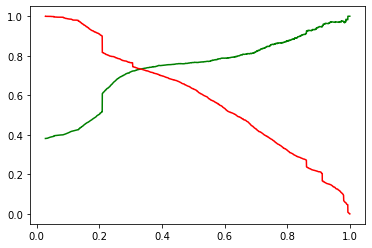

In [128]:
# Plotting the trade-off values.
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [129]:
# Scaling 'df_test' dataframe
cols_test = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_test[cols_test] = scaler.transform(df_test[cols_test])

# Checking the first 5 rows of 'df_test' dataframe.
df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7625,0,0,0,-0.397202,2.077703,-0.136180,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5207,0,0,1,0.297929,0.739164,0.926758,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2390,0,0,1,-1.092332,-0.878390,-1.199117,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4362,0,0,0,-0.397202,-0.455310,-0.136180,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1023,0,0,0,4.121147,-0.300302,1.458226,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [130]:
# Dividing 'df_test' dataframe into 'X_test' and 'y_test'
y_test = df_test.pop('Converted')
X_test = df_test

In [131]:
# Selecting only those cols used for model building.
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed
7625,0,2.077703,0,0,0,0,0,0,0,1
5207,0,0.739164,0,0,0,0,0,0,0,1
2390,0,-0.878390,0,0,0,0,1,0,0,1
4362,0,-0.455310,0,0,0,0,0,0,0,1
1023,0,-0.300302,0,0,0,0,0,0,0,1


In [132]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [133]:
# Making prediction using the final model
y_test_pred = res.predict(X_test_sm)

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
# Checking the first 5 rows of the predicted dataframe.
y_pred_1.head()

,0
7625,0.805733
5207,0.482437
2390,0.084317
4362,0.197434
1023,0.226263


In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [138]:
# Resetting the indexes for both dataframes. 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Concatinating 'y_test_df' and 'y_pred_1'.
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.805733
1,1,5207,0.482437
2,1,2390,0.084317
3,0,4362,0.197434
4,0,1023,0.226263


In [140]:
# Renaming the column '0'.
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [141]:
# Rearranging the columns.
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,7625,0,0.805733
1,5207,1,0.482437
2,2390,1,0.084317
3,4362,0,0.197434
4,1023,0,0.226263


In [142]:
# Applying the threshold and calculating the final predicted value.
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,7625,0,0.805733,1
1,5207,1,0.482437,1
2,2390,1,0.084317,0
3,4362,0,0.197434,0
4,1023,0,0.226263,0


In [143]:
# Calculating the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7908887229275579

In [144]:
# Calculating the confusion matrix.
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1357,  327],
       [ 233,  761]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Calculating the sensitivity of our logistic regression model.
TP / float(TP+FN)

0.7655935613682092

In [147]:
# Calculating the specificity of our logistic regression model.
TN / float(TN+FP)

0.8058194774346793

## Final Observation:
Let us compare the values obtained for Train & Test data at cut-off value '0.3':

- Train Data: 
    - Accuracy    : 79.66%
    - Sensitivity : 76.50%
    - Specificity : 81.60%
- Test Data: 
    - Accuracy    : 79.08%
    - Sensitivity : 76.55%
    - Specificity : 80.58%

## Potential leads

In [148]:
# Checking the 'y_train_pred_final' dataframe.
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.659683,6676,1,1,1,1,1,1,1,1,0,0,0,1,66
1,1,0.446536,6138,0,1,1,1,1,1,0,0,0,0,0,1,45
2,1,0.955330,8650,1,1,1,1,1,1,1,1,1,1,1,1,96
3,0,0.209248,3423,0,1,1,1,0,0,0,0,0,0,0,0,21
4,0,0.209248,6552,0,1,1,1,0,0,0,0,0,0,0,0,21


In [149]:
# Creating a new dataframe 'potential_leads' to store the 'ProspectID' and 'Lead Scores' of customers.
potential_leads = y_train_pred_final[['Prospect ID','Lead Score']]
potential_leads.sort_values(by='Lead Score',ascending=False,inplace=True)
potential_leads.head(20)

,Prospect ID,Lead Score
2198,1614,100
3518,2378,100
4780,818,100
591,4662,100
3480,4123,100
3820,7219,100
1959,6944,100
3072,8120,100
903,5293,100
5060,6647,100


## Inference:
- As per the problem statement, we know that a lot of leads are generated in the initial stage but only a few of them convert as paying customers.
- The 'potential_leads' dataframe above has 'ProspectID's' along with 'Lead Scores' of various customers. Sales team can refer to the dataframe and contact the customers whose lead scores are the highest since they have a higher conversion chance.
- The sales team can contact the customers with low lead scores at the last since they have a lower conversion chance.